In [7]:
import pandas as pd
import numpy as np

In [8]:
###################################################################################
#                  1. 정형 데이터마이닝 (사용 데이터 : lotto)                  
###################################################################################

In [9]:
#---------------------------------------------------------------------------------
# Q1) 연관규칙분석을 수행하기 위해 lotto 데이터셋을 transaction 데이터로 변환하시오. 
#     단, 본 분석에서 로또번호가 추첨된 순서는 고려하지 않고 분석을 수행하도록 한다. 
#     그리고 변환된 데이터에서 가장 많이 등장한 
#     상위 10개의 로또번호를 막대그래프로 출력하고 이에 대해 설명하시오.  
#---------------------------------------------------------------------------------

In [10]:
# 데이터 로딩
df_lotto = pd.read_csv("/content/drive/MyDrive/ADP24/ADP스터디/3_데이터에듀 모의고사 문제 및 데이터/모의고사 1회/lotto.csv")
df_lotto.head()

,time_id,num1,num2,num3,num4,num5,num6
0,859,8,22,35,38,39,41
1,858,9,13,32,38,39,43
2,857,6,10,16,28,34,38
3,856,10,24,40,41,43,44
4,855,8,15,17,19,43,44


In [11]:
df_lotto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   time_id  859 non-null    int64
 1   num1     859 non-null    int64
 2   num2     859 non-null    int64
 3   num3     859 non-null    int64
 4   num4     859 non-null    int64
 5   num5     859 non-null    int64
 6   num6     859 non-null    int64
dtypes: int64(7)
memory usage: 47.1 KB


In [12]:
df_lotto.describe()

,time_id,num1,num2,num3,num4,num5,num6
count,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000
mean,430.000000,6.641444,13.012806,19.863795,26.183935,32.844005,39.478463
std,248.116236,5.247440,6.819421,7.487602,7.643952,6.889834,5.345668
min,1.000000,1.000000,2.000000,3.000000,5.000000,9.000000,19.000000
25%,215.500000,2.500000,8.000000,14.000000,21.000000,28.000000,37.000000
50%,430.000000,5.000000,12.000000,19.000000,27.000000,34.000000,41.000000
75%,644.500000,10.000000,17.000000,25.000000,32.000000,38.000000,44.000000
max,859.000000,35.000000,37.000000,40.000000,43.000000,44.000000,45.000000


In [13]:
#num1~num6 컬럼의 값이 최소 1, 최대 45임
#따라서 컬럼이 1~45인 컬럼을 생성해서 one hot encoding처럼 해보자
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [14]:
df_lotto_list = df_lotto.iloc[:,1:].values.tolist()
df_lotto_list[0:5]

[[8, 22, 35, 38, 39, 41],
 [9, 13, 32, 38, 39, 43],
 [6, 10, 16, 28, 34, 38],
 [10, 24, 40, 41, 43, 44],
 [8, 15, 17, 19, 43, 44]]

In [39]:
te = TransactionEncoder()
te_result = te.fit(df_lotto_list).transform(df_lotto_list)
te_result

array([[False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [40]:
dir(te)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'columns_',
 'columns_mapping_',
 'fit',
 'fit_transform',
 'get_params',
 'inverse_transform',
 'set_params',
 'transform']

In [16]:
te.columns_

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45]

In [17]:
te_result_df = pd.DataFrame(te_result, columns = te.columns_)
te_result_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,True,False,False
2,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False
855,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False
856,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
857,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False


In [18]:
top10 = pd.Series(te_result_df.sum().sort_values(ascending=False)[0:10])

In [19]:
top10

34    134
27    126
40    126
43    125
20    124
12    123
17    123
1     122
10    122
13    122
dtype: int64

In [20]:
top10 = pd.DataFrame(top10)
top10.index = top10.index.astype('str')
top10.index

Index(['34', '27', '40', '43', '20', '12', '17', '1', '10', '13'], dtype='object')

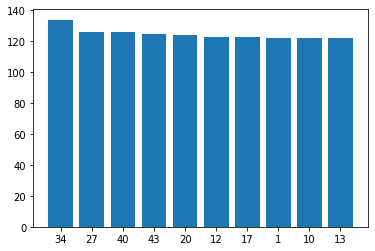

In [21]:
import matplotlib.pyplot as plt
plt.bar(top10.index, top10[0])
#plt.xticks(top10.index,top10.values)
#plt.bar(top10.index,top10.values)
plt.show()

#Q1
숫자 34가 134회로 가장 빈번하게 나타났으며,

숫자 27 두번쨰로 빈번하며, 그뒤로 40 43 20 12 17 1 10 13순으로 상위 10개가 빈번하게 나타났다.

In [22]:
#-------------------------------------------------------------------------------------
# Q2) 변환한 데이터에 대해 apriori함수를 사용하여 다음 괄호 안의 조건을 반영하여 
#     연관규칙을 생성하고, 이를 ‘rules_1’이라는 변수에 저장하여 결과를 해석하시오. 
#     (최소 지지도 : 0.002, 최소 신뢰도 : 0.8, 최소조합 항목 수 : 2개, 최대조합 항목 수 : 6개) 
#     그리고 도출된 연관규칙들을 향상도를 기준으로 내림차순 정렬하여 상위 30개의 규칙을 확인하고, 
#     이를 데이터프레임으로 변환하여 csv파일로 출력하시오.  
#-------------------------------------------------------------------------------------

In [23]:
itemset = apriori(te_result_df,min_support= 0.002, use_colnames=True)
itemset

,support,itemsets
0,0.142026,(1)
1,0.130384,(2)
2,0.129220,(3)
3,0.133877,(4)
4,0.138533,(5)
...,...,...
6358,0.002328,"(40, 43, 13, 14, 26)"
6359,0.002328,"(14, 15, 18, 21, 26)"
6360,0.002328,"(40, 14, 27, 30, 31)"
6361,0.002328,"(34, 44, 15, 19, 21)"


In [24]:
from mlxtend.frequent_patterns import association_rules
#rules = association_rules(itemset, metric="confidence",min_threshold=0.8)
rules_1 = association_rules(itemset)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(1, 3, 43)",(12),0.002328,0.143190,0.002328,1.0,6.983740,0.001995,inf
1,"(1, 3, 15)",(25),0.002328,0.129220,0.002328,1.0,7.738739,0.002027,inf
2,"(25, 3, 15)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf
3,"(25, 3, 20)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf
4,"(29, 3, 37)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf
...,...,...,...,...,...,...,...,...,...
699,"(16, 26, 43, 31)",(36),0.002328,0.133877,0.002328,1.0,7.469565,0.002017,inf
700,"(16, 43, 36)","(26, 31)",0.002328,0.015134,0.002328,1.0,66.076923,0.002293,inf
701,"(16, 26, 36)","(43, 31)",0.002328,0.018626,0.002328,1.0,53.687500,0.002285,inf
702,"(16, 26, 43)","(36, 31)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf


In [25]:
rules_1['antecedents_len']=1
rules_1['consequents_len']=1
for i in range(0,len(rules_1)):
    rules_1['antecedents_len'][i] = len(rules_1['antecedents'][i])
    rules_1['consequents_len'][i] = len(rules_1['consequents'][i])
rules_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len,consequents_len
0,"(1, 3, 43)",(12),0.002328,0.143190,0.002328,1.0,6.983740,0.001995,inf,3,1
1,"(1, 3, 15)",(25),0.002328,0.129220,0.002328,1.0,7.738739,0.002027,inf,3,1
2,"(25, 3, 15)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf,3,1
3,"(25, 3, 20)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf,3,1
4,"(29, 3, 37)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf,3,1
...,...,...,...,...,...,...,...,...,...,...,...
699,"(16, 26, 43, 31)",(36),0.002328,0.133877,0.002328,1.0,7.469565,0.002017,inf,4,1
700,"(16, 43, 36)","(26, 31)",0.002328,0.015134,0.002328,1.0,66.076923,0.002293,inf,3,2
701,"(16, 26, 36)","(43, 31)",0.002328,0.018626,0.002328,1.0,53.687500,0.002285,inf,3,2
702,"(16, 26, 43)","(36, 31)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,3,2


In [26]:
rules_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         704 non-null    object 
 1   consequents         704 non-null    object 
 2   antecedent support  704 non-null    float64
 3   consequent support  704 non-null    float64
 4   support             704 non-null    float64
 5   confidence          704 non-null    float64
 6   lift                704 non-null    float64
 7   leverage            704 non-null    float64
 8   conviction          704 non-null    float64
 9   antecedents_len     704 non-null    int64  
 10  consequents_len     704 non-null    int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 60.6+ KB


In [27]:
#rules.loc[(rules['confidence']>=0.8)%(rules['antecedents_len']>=2)&(rules['antecedents_len']<=6)]
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len,consequents_len
0,"(1, 3, 43)",(12),0.002328,0.143190,0.002328,1.0,6.983740,0.001995,inf,3,1
1,"(1, 3, 15)",(25),0.002328,0.129220,0.002328,1.0,7.738739,0.002027,inf,3,1
2,"(25, 3, 15)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf,3,1
3,"(25, 3, 20)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf,3,1
4,"(29, 3, 37)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf,3,1
...,...,...,...,...,...,...,...,...,...,...,...
699,"(16, 26, 43, 31)",(36),0.002328,0.133877,0.002328,1.0,7.469565,0.002017,inf,4,1
700,"(16, 43, 36)","(26, 31)",0.002328,0.015134,0.002328,1.0,66.076923,0.002293,inf,3,2
701,"(16, 26, 36)","(43, 31)",0.002328,0.018626,0.002328,1.0,53.687500,0.002285,inf,3,2
702,"(16, 26, 43)","(36, 31)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,3,2


In [28]:
rules_1 = rules_1[ (rules_1['consequents_len']==1) & (rules_1['confidence']>=0.8) & (rules_1['antecedents_len']>=2) & (rules_1['antecedents_len']<=6) & (rules_1['support']>=0.002)]

In [29]:
rules_1.describe()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len,consequents_len
count,679.000000,679.000000,679.000000,679.0,679.000000,679.000000,679.0,679.000000,679.0
mean,0.002364,0.135245,0.002364,1.0,7.433846,0.002044,inf,3.069219,1.0
std,0.000202,0.009589,0.000202,0.0,0.566550,0.000174,NaN,0.254014,0.0
min,0.002328,0.103609,0.002328,1.0,6.410448,0.001965,inf,3.000000,1.0
25%,0.002328,0.130384,0.002328,1.0,7.040984,0.001998,inf,3.000000,1.0
50%,0.002328,0.137369,0.002328,1.0,7.279661,0.002011,NaN,3.000000,1.0
75%,0.002328,0.142026,0.002328,1.0,7.669643,0.002027,inf,3.000000,1.0
max,0.003492,0.155995,0.003492,1.0,9.651685,0.003098,inf,4.000000,1.0


# Q2

In [30]:
rules_1.sort_values(by='lift', ascending=False)[0:30]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len,consequents_len
254,"(28, 7, 23)",(9),0.002328,0.103609,0.002328,1.0,9.651685,0.002087,inf,3,1
335,"(32, 43, 38)",(9),0.002328,0.103609,0.002328,1.0,9.651685,0.002087,inf,3,1
324,"(17, 14, 33)",(9),0.002328,0.103609,0.002328,1.0,9.651685,0.002087,inf,3,1
330,"(18, 35, 23)",(9),0.002328,0.103609,0.002328,1.0,9.651685,0.002087,inf,3,1
591,"(33, 36, 37)",(22),0.002328,0.107101,0.002328,1.0,9.336957,0.002079,inf,3,1
274,"(7, 29, 23)",(22),0.002328,0.107101,0.002328,1.0,9.336957,0.002079,inf,3,1
276,"(24, 31, 7)",(22),0.002328,0.107101,0.002328,1.0,9.336957,0.002079,inf,3,1
280,"(34, 7, 31)",(22),0.002328,0.107101,0.002328,1.0,9.336957,0.002079,inf,3,1
356,"(10, 36, 34)",(22),0.002328,0.107101,0.002328,1.0,9.336957,0.002079,inf,3,1
353,"(10, 27, 42)",(22),0.002328,0.107101,0.002328,1.0,9.336957,0.002079,inf,3,1


In [31]:
#---------------------------------------------------------------------------------------
# Q3) 생성된 연관규칙 'rules_1'에 대한 정보를 해석하고, 1)번 문제를 통해 확인했을 때 
#     가장 많이 추첨된 번호가 우측항에 존재하는 규칙들만을 ‘rules_most_freq’라는 변수에 저장하시오. 
#     그리고 해당 규칙들을 해석하여 인사이트를 도출한 후 서술하시오.
#---------------------------------------------------------------------------------------

In [32]:
top10.index

Index(['34', '27', '40', '43', '20', '12', '17', '1', '10', '13'], dtype='object')

In [33]:
rules_1.describe()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len,consequents_len
count,679.000000,679.000000,679.000000,679.0,679.000000,679.000000,679.0,679.000000,679.0
mean,0.002364,0.135245,0.002364,1.0,7.433846,0.002044,inf,3.069219,1.0
std,0.000202,0.009589,0.000202,0.0,0.566550,0.000174,NaN,0.254014,0.0
min,0.002328,0.103609,0.002328,1.0,6.410448,0.001965,inf,3.000000,1.0
25%,0.002328,0.130384,0.002328,1.0,7.040984,0.001998,inf,3.000000,1.0
50%,0.002328,0.137369,0.002328,1.0,7.279661,0.002011,NaN,3.000000,1.0
75%,0.002328,0.142026,0.002328,1.0,7.669643,0.002027,inf,3.000000,1.0
max,0.003492,0.155995,0.003492,1.0,9.651685,0.003098,inf,4.000000,1.0


In [37]:
rules_most_freq = rules_1[rules_1['consequents'] == {34}]
rules_most_freq

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len,consequents_len
8,"(1, 5, 13)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1
50,"(2, 4, 31)",(34),0.003492,0.155995,0.003492,1.0,6.410448,0.002948,inf,3,1
68,"(2, 21, 15)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1
72,"(2, 28, 15)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1
192,"(5, 29, 13)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1
203,"(17, 5, 29)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1
281,"(7, 22, 31)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1
282,"(24, 31, 7)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1
419,"(12, 37, 36)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1
471,"(25, 44, 14)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1


In [38]:
rules_most_freq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 8 to 693
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         19 non-null     object 
 1   consequents         19 non-null     object 
 2   antecedent support  19 non-null     float64
 3   consequent support  19 non-null     float64
 4   support             19 non-null     float64
 5   confidence          19 non-null     float64
 6   lift                19 non-null     float64
 7   leverage            19 non-null     float64
 8   conviction          19 non-null     float64
 9   antecedents_len     19 non-null     int64  
 10  consequents_len     19 non-null     int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 1.8+ KB


# Q3
    총 23개의 조합을 찾을 수 있으며,
    첫번째 규칙은 (1,5,13) 숫자를 뽑았을 때, (34)라는 숫자가 함께 나올 확률이 0.002328로 약 0.2%수준이며, 
    lift는 6.410448로, (34)숫자만 존재할 때보다, (1,5,13)과 함께 (34)가 나올 확률이 6배 이상 높다는 것을 의미한다.